Mexico Toy Sales
Sales & inventory data for a fictitious chain of toy stores in Mexico called Maven Toys, including information about products, stores, daily sales transactions, and current inventory levels at each location.


Source:Maven Analytics
License:Public domain
    
Recommended Analysis

Which product categories drive the biggest profits? Is this the same across store locations?

Can you find any seasonal trends or patterns in the sales data?

Are sales being lost with out-of-stock products at certain locations?

How much money is tied up in inventory at the toy stores? How long will it last?

In [138]:
import pandas as pd

#Exploring Inventory Table

In [139]:
i=pd.read_csv('inventory.csv')

In [140]:
i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Store_ID       1593 non-null   int64
 1   Product_ID     1593 non-null   int64
 2   Stock_On_Hand  1593 non-null   int64
dtypes: int64(3)
memory usage: 37.5 KB


In [141]:
i.head()

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [142]:
i.duplicated().sum()

0

In [143]:
i.isnull().sum()

Store_ID         0
Product_ID       0
Stock_On_Hand    0
dtype: int64

#changed datatype where needed

In [144]:
i['Store_ID']=i['Store_ID'].astype('object')
i['Product_ID']=i['Product_ID'].astype('object')

In [145]:
i.dtypes

Store_ID         object
Product_ID       object
Stock_On_Hand     int64
dtype: object

#Exploring Products table

In [146]:
p=pd.read_csv('products.csv')

In [147]:
p.head()

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [148]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        35 non-null     int64 
 1   Product_Name      35 non-null     object
 2   Product_Category  35 non-null     object
 3   Product_Cost      35 non-null     object
 4   Product_Price     35 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [149]:
p.duplicated().sum()

0

#removing $ from price and cost

In [150]:

p['Product_Cost']=p['Product_Cost'].apply(lambda x:x.strip('$'))

In [151]:
p['Product_Price']=p['Product_Price'].apply(lambda x:x.strip('$'))

In [152]:
p[['Product_Cost','Product_Price']].head(2)

,Product_Cost,Product_Price
0,9.99,15.99
1,9.99,12.99


#changing datatype when needed

In [153]:
p['Product_ID']=p['Product_ID'].astype('object')


In [154]:
p['Product_Cost']=p['Product_Cost'].astype('float')
p['Product_Price']=p['Product_Price'].astype('float')


In [155]:
p.dtypes

Product_ID           object
Product_Name         object
Product_Category     object
Product_Cost        float64
Product_Price       float64
dtype: object

#changing some column names

In [156]:
p.rename(columns={'Product_Cost':'Product_Cost_Dollars','Product_Price':'Product_Price_Dollars'},inplace=True)

In [157]:
p.columns

Index(['Product_ID', 'Product_Name', 'Product_Category',
       'Product_Cost_Dollars', 'Product_Price_Dollars'],
      dtype='object')

#exploring stores table

In [158]:
s=pd.read_csv('stores.csv')

In [159]:
s.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


In [160]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store_ID         50 non-null     int64 
 1   Store_Name       50 non-null     object
 2   Store_City       50 non-null     object
 3   Store_Location   50 non-null     object
 4   Store_Open_Date  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [161]:
s.duplicated().sum()

0

In [162]:
#changing few datatypes

In [163]:
s['Store_Open_Date']=pd.to_datetime(s['Store_Open_Date'])

In [164]:
s['Store_ID']=s['Store_ID'].astype('object')

In [165]:
s.dtypes

Store_ID                   object
Store_Name                 object
Store_City                 object
Store_Location             object
Store_Open_Date    datetime64[ns]
dtype: object

#exploring sales data

In [166]:
sales=pd.read_csv('Sales.csv')

In [167]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [168]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sale_ID     829262 non-null  int64 
 1   Date        829262 non-null  object
 2   Store_ID    829262 non-null  int64 
 3   Product_ID  829262 non-null  int64 
 4   Units       829262 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 31.6+ MB


In [169]:
s.duplicated().sum()

0

#changing a few data types

In [170]:
sales['Sale_ID']=sales['Sale_ID'].astype('object')
sales['Store_ID']=sales['Store_ID'].astype('object')
sales['Product_ID']=sales['Product_ID'].astype('object')
sales['Date']=pd.to_datetime(sales['Date'])


In [171]:
sales.dtypes

Sale_ID               object
Date          datetime64[ns]
Store_ID              object
Product_ID            object
Units                  int64
dtype: object

Which product categories drive the biggest profits? Is this the same across store locations?


In [172]:
dummy1=p[['Product_ID','Product_Category']]

In [173]:
sales=pd.merge(sales,dummy1,on='Product_ID',how='left')

In [174]:
sales.shape

(829262, 6)

In [175]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Category
0,1,2017-01-01,24,4,1,Games
1,2,2017-01-01,28,1,1,Toys
2,3,2017-01-01,6,8,1,Games
3,4,2017-01-01,48,7,1,Sports & Outdoors
4,5,2017-01-01,44,18,1,Toys


In [176]:
dummy2=p[['Product_ID','Product_Name','Product_Price_Dollars','Product_Cost_Dollars']]

In [177]:
sales=pd.merge(sales,dummy2,on='Product_ID',how='left')

In [178]:
sales.shape

(829262, 9)

In [179]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Category,Product_Name,Product_Price_Dollars,Product_Cost_Dollars
0,1,2017-01-01,24,4,1,Games,Chutes & Ladders,12.99,9.99
1,2,2017-01-01,28,1,1,Toys,Action Figure,15.99,9.99
2,3,2017-01-01,6,8,1,Games,Deck Of Cards,6.99,3.99
3,4,2017-01-01,48,7,1,Sports & Outdoors,Dart Gun,15.99,11.99
4,5,2017-01-01,44,18,1,Toys,Lego Bricks,39.99,34.99


In [180]:
sales['Profit']=(sales['Product_Price_Dollars']-sales['Product_Cost_Dollars'])*sales['Units']

In [181]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Profit by category')

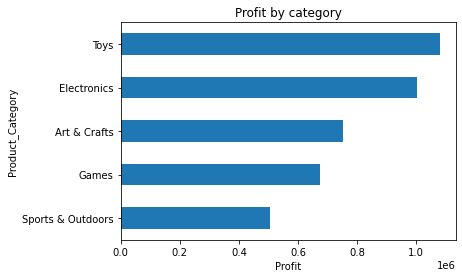

In [182]:
sales.groupby('Product_Category')['Profit'].sum().sort_values().plot(kind='barh')
plt.xlabel('Profit')
plt.title('Profit by category')

Toys and Electronics are the major drivers of Profit in the Product Catergories

In [183]:
dummy3=s[['Store_ID','Store_City']]

In [184]:
sales=pd.merge(sales,dummy3,on='Store_ID',how='left')

In [185]:
sales.shape

(829262, 11)

<AxesSubplot:ylabel='Store_City,Product_Category'>

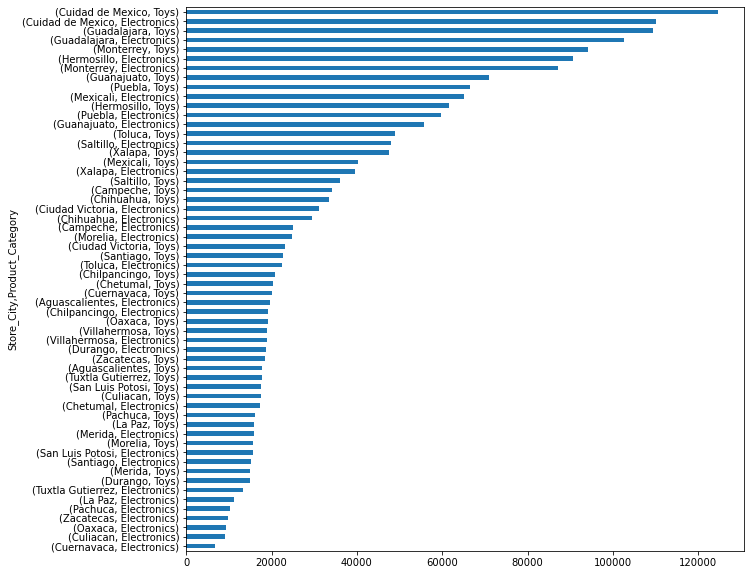

In [186]:
plt.figure(figsize=(10,10))
sales[sales['Product_Category'].isin(['Toys','Electronics'])].groupby(['Store_City','Product_Category'])['Profit'].sum().sort_values().plot(kind='barh')

Across Store Locations we see that Toys and Electronics do not have the same profit drive.

Can you find any seasonal trends or patterns in the sales data?


In [187]:
sales['year']=sales['Date'].dt.year
sales['month']=sales['Date'].dt.month

In [188]:
import seaborn as sns

In [189]:
dummy4=sales.groupby(['year','month','Product_Category'])['Profit'].sum().reset_index()

<AxesSubplot:xlabel='month', ylabel='Profit'>

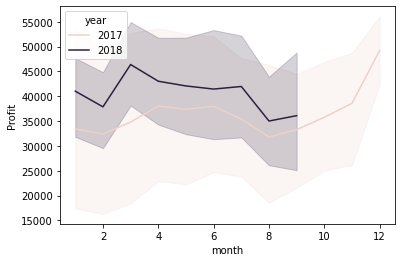

In [190]:
sns.lineplot(x='month',y='Profit',hue='year',data=dummy4)

#The year end Profits are high during holiday season in december in the year 2017
#There is dip in profits in Feb and August across the two years

Text(0.5, 1.0, 'Profit over months in 2018')

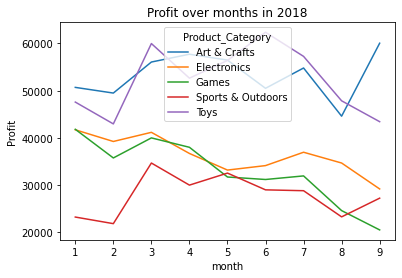

In [191]:
sns.lineplot(x='month',y='Profit',hue='Product_Category',data=dummy4[dummy4['year']==2018])
plt.title('Profit over months in 2018')

Text(0.5, 1.0, 'Profit over months in 2017')

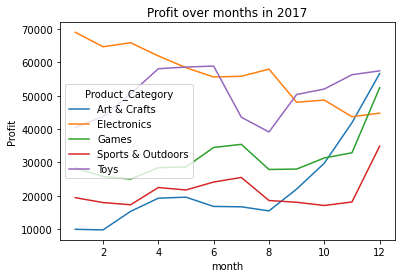

In [192]:
sns.lineplot(x='month',y='Profit',hue='Product_Category',data=dummy4[dummy4['year']==2017])
plt.title('Profit over months in 2017')

#The demad for Arst and Crafts product is incresing around august

Are sales being lost with out-of-stock products at certain locations?

In [193]:
sales.head()

,Sale_ID,Date,Store_ID,Product_ID,Units,Product_Category,Product_Name,Product_Price_Dollars,Product_Cost_Dollars,Profit,Store_City,year,month
0,1,2017-01-01,24,4,1,Games,Chutes & Ladders,12.99,9.99,3.0,Aguascalientes,2017,1
1,2,2017-01-01,28,1,1,Toys,Action Figure,15.99,9.99,6.0,Puebla,2017,1
2,3,2017-01-01,6,8,1,Games,Deck Of Cards,6.99,3.99,3.0,Mexicali,2017,1
3,4,2017-01-01,48,7,1,Sports & Outdoors,Dart Gun,15.99,11.99,4.0,Saltillo,2017,1
4,5,2017-01-01,44,18,1,Toys,Lego Bricks,39.99,34.99,5.0,Puebla,2017,1


In [194]:
dummy5=sales.groupby(['Store_ID','Product_ID','Units'])['Profit'].sum().reset_index()

In [195]:
dummy5.head()

,Store_ID,Product_ID,Units,Profit
0,1,1,1,5364.0
1,1,1,2,768.0
2,1,1,3,1368.0
3,1,1,4,72.0
4,1,2,1,1461.0


In [196]:
i=pd.merge(i,p,on='Product_ID',how='left')

In [197]:
i.head()

,Store_ID,Product_ID,Stock_On_Hand,Product_Name,Product_Category,Product_Cost_Dollars,Product_Price_Dollars
0,1,1,27,Action Figure,Toys,9.99,15.99
1,1,2,0,Animal Figures,Toys,9.99,12.99
2,1,3,32,Barrel O' Slime,Art & Crafts,1.99,3.99
3,1,4,6,Chutes & Ladders,Games,9.99,12.99
4,1,5,0,Classic Dominoes,Games,7.99,9.99


In [198]:
i['Total_Particular_Product_Cost']=i['Product_Cost_Dollars']*i['Stock_On_Hand']

In [199]:
i['Total_Particular_Product_Price']=i['Product_Price_Dollars']*i['Stock_On_Hand']

In [200]:
dummy6=i[i['Stock_On_Hand']==0]#table for products quantitye zero in store

In [201]:
dummy7=sales[sales.Product_ID.isin(dummy6.Product_ID)].groupby(['Product_ID','Product_Name'])['Profit','Units'].mean().reset_index()

In [202]:
dummy7

,Product_ID,Product_Name,Profit,Units
0,1,Action Figure,7.170505,1.195084
1,2,Animal Figures,3.636186,1.212062
2,3,Barrel O' Slime,3.390029,1.695015
3,4,Chutes & Ladders,3.104595,1.034865
4,5,Classic Dominoes,2.094636,1.047318
5,9,Dino Egg,1.356801,1.356801
6,11,Etch A Sketch,10.859438,1.085944
7,12,Foam Disk Launcher,3.355843,1.118614
8,13,Gamer Headphones,6.932252,1.155375
9,14,Glass Marbles,7.654548,1.530910


#The products which are out of stock in some stores and their average profit and average units sold from stores where they are available

How much money is tied up in inventory at the toy stores? How long will it last?

In [203]:
i[['Total_Particular_Product_Cost','Total_Particular_Product_Price']].sum()

Total_Particular_Product_Cost     300209.58
Total_Particular_Product_Price    410240.58
dtype: float64

In [204]:
#Total money tied up in inventory at toy stores

In [205]:
sales['Total_Cost']=sales['Product_Cost_Dollars']*sales['Units']
sales['Total_Price']=sales['Product_Price_Dollars']*sales['Units']

In [206]:
sales.groupby(['year','month'])['Total_Cost','Total_Price'].sum()

Total_Cost  Total_Price
year month                         
2017 1       375428.91    542554.91
     2       379490.65    541351.65
     3       415493.19    589485.19
     4       490973.98    681072.98
     5       485475.90    672369.90
     6       472165.22    661980.22
     7       379112.23    556034.23
     8       330491.73    489422.73
     9       419447.04    585844.04
     10      445075.39    623874.39
     11      468431.15    661304.15
     12      631125.69    877203.69
2018 1       542122.22    747196.22
     2       533318.19    722632.19
     3       651606.64    883515.64
     4       612595.07    827691.07
     5       614972.49    825319.49
     6       601087.25    808299.25
     7       618541.86    828348.86
     8       485839.07    660877.07
     9       477749.48    658194.48

#Total sales over the past years based on total units sold

The inventory will last less than a month